# CM50266 Applied Data Science
## Lab 3 (Task 3): Time Diary Data Capture, Analysis and Reporting

For analysing the complete dataset, with outputs such as data visualisations that show the results of our analysis.

In [1]:
# Importing the libraries used
import pandas as pd
import csv
import datetime
import numpy as np
import glob
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## Obtaining the dataset

code that processes all of the .csv files provided and combining all of the
individual datasets into a single dataset for analysis

In [2]:
# Function to read all of the csv files into a single pandas dataframe
def obtain_dataset(folder_name):
    
    data = []
    
    # Iterating through all of the csv files
    for filename in glob.glob(folder_name+'/*.csv'):
        
        # Storing their instance
        csv_df = pd.read_csv(filename, index_col=None, header=0)
        data.append(csv_df)
    
    # And concatinating them into a single dataset
    dataset = pd.concat(data, axis=0, ignore_index=True)
    
    return dataset
    
full_dataset = obtain_dataset('data')

In [3]:
full_dataset.head()

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore,...,Screen-based Activity?,WatchingScreen,CoffeeCups,StressScore,Email checking,Alcohol consumption,How many people are you with?,Are you at home?,WithOthers,NumberOfPeople
0,S801,,Sleeping,08/03/2021,24.0,Monday,00:00,07:00,420.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O733,,Getting ready,08/03/2021,24.0,Monday,07:00,07:30,29.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X893,UD415,Exercising while listening music,08/03/2021,24.0,Monday,07:30,08:15,45.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ED152,,Breakfast,08/03/2021,24.0,Monday,08:15,08:45,29.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CW982,,ADS Lab 3,08/03/2021,24.0,Monday,08:45,11:15,150.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtering the dataframe to the common 10 columns
(disregarding the additional data columns as each person had different ones and serve no real use in the evaluation and results we ant to gather)

In [4]:
standard_dataset_columns = ['PrimaryActivityCode','SecondaryActivityCode','DescriptiveLabel','StartDate','UniBathWeekNo','DayOfWeek','StartTime','EndTime','DurationMins','EnjoymentScore']
standard_dataset = full_dataset[standard_dataset_columns].copy()

In [5]:
# Observing the first 5 records of the dataset
standard_dataset.head()

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,S801,,Sleeping,08/03/2021,24.0,Monday,00:00,07:00,420.0,2.0
1,O733,,Getting ready,08/03/2021,24.0,Monday,07:00,07:30,29.0,1.0
2,X893,UD415,Exercising while listening music,08/03/2021,24.0,Monday,07:30,08:15,45.0,2.0
3,ED152,,Breakfast,08/03/2021,24.0,Monday,08:15,08:45,29.0,1.0
4,CW982,,ADS Lab 3,08/03/2021,24.0,Monday,08:45,11:15,150.0,1.0


In [6]:
# Using the descibe method to check for anomalies in the minimum and maximum
standard_dataset.describe()

,UniBathWeekNo,DurationMins,EnjoymentScore
count,3003.000000,3016.000000,2645.000000
mean,23.091908,1664.026824,0.744045
std,2.626711,21999.560712,1.134942
min,-30.000000,0.000000,-2.000000
25%,23.000000,30.000000,0.000000
50%,23.000000,60.000000,1.000000
75%,24.000000,120.000000,2.000000
max,28.000000,570000.000000,2.000000


# Data Wrangling methods for all columns

In [7]:
# Creating a copy of the dataset which I will then use to perform my data wrangling methods
filtered_dataset = standard_dataset
print(filtered_dataset.shape)

(3122, 10)


## Fixing PrimaryActivityCode column

Removing any row that does not contain any of the 12 valid activities code in the PrimaryActivityCode column

In [8]:
valid_activity_codes = ['ED145','EL642', 'X893', 'H179', 'L418', 'R523', 'S801', 'T695', 'UD415', 'PW101', 'CW982', 'O733']

# Storing only the rows that contain values in the PrimaryActivityCode that are in the above list
filtered_dataset = filtered_dataset.loc[filtered_dataset['PrimaryActivityCode'].isin(valid_activity_codes)]

# Then resetting the index
filtered_dataset.reset_index(drop=True, inplace=True)

## Fixing SecondaryActivityCode column

Since this column was optional to fill in, blank entries or any of the 12 valid activity codes are both acceptable

In [9]:
# Observing all of the unique entries we have in the SecondaryActivityCode column
print(list(filtered_dataset.SecondaryActivityCode.unique()))

[' ', 'UD415', nan, 'CW982', 'L418', 'SA114', 'SA151', 'R523', 'H179', 'ED145', 'O733', 'X893', 'EL642', 'T695', 'OTH', 'ESS', 'PRO', 'ENT', 'S801', 'PW101', ' L418', ' O733', 'ED152']


In [10]:
# List of valid entries in the secondary activity code column
valid_activity_codes2 = ['ED145','EL642', 'X893', 'H179', 'L418', 'R523', 'S801', 'T695', 'UD415', 'PW101', 'CW982', 'O733', '']

# From the unique entries I saw that there where space values (' ') and nan values
# I assumed that these where the empty fields so I replaced them with empty values ('')
filtered_dataset.loc[filtered_dataset.SecondaryActivityCode == ' ', 'SecondaryActivityCode'] = ''
filtered_dataset.loc[(filtered_dataset['SecondaryActivityCode']).isnull(), 'SecondaryActivityCode'] = ''

# TStoring only the rows that contain values in the SecondaryActivityCode that are in the above list
filtered_dataset = filtered_dataset.loc[filtered_dataset['SecondaryActivityCode'].isin(valid_activity_codes2)]

# Showing the new list of unique values
print(list(filtered_dataset.SecondaryActivityCode.unique()))

# Resetting the index
filtered_dataset.reset_index(drop=True, inplace=True)

# The Warning shown has no effect in the processing of the dataset and it is due to how
# copies and views are handled. No way to overcome this warning...

['', 'UD415', 'CW982', 'L418', 'R523', 'H179', 'ED145', 'O733', 'X893', 'EL642', 'T695', 'S801', 'PW101']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


## Descriptive Label (checking for personally identifiable information)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Replacing nan with empty field
filtered_dataset.loc[(filtered_dataset['DescriptiveLabel']).isnull(), 'DescriptiveLabel'] = ''

# Using the count vectorizer method
count_vect = CountVectorizer()
# Fitting it to all of the descriptive labels in the dataset
descriptions = count_vect.fit_transform(filtered_dataset['DescriptiveLabel'])

# Then printing the complete dictionary with all of the unique words
print(count_vect.get_feature_names())

# Scrubbing through the dictionary created their is 
# no indication of personally ndentifiable information
# Thus there is no need to further process any entry within this column

['5k', 'about', 'active', 'activity', 'admin', 'ads', 'after', 'afternoon', 'ahead', 'alarm', 'and', 'another', 'applied', 'appointments', 'apps', 'aquarium', 'around', 'arranging', 'arrived', 'articles', 'as', 'assignment', 'assignments', 'at', 'ate', 'attending', 'audio', 'audiobook', 'authors', 'back', 'background', 'ball', 'bath', 'bathing', 'bayesian', 'bed', 'before', 'bike', 'blog', 'blueberries', 'bml', 'body', 'bodyweight', 'book', 'books', 'break', 'breakfast', 'brekky', 'briefing', 'browsing', 'brunch', 'brush', 'brushing', 'bubble', 'building', 'built', 'burshing', 'butter', 'buying', 'call', 'calling', 'calls', 'car', 'cardio', 'cereal', 'change', 'changing', 'channel', 'chat', 'chatting', 'check', 'checking', 'chess', 'chicken', 'chilling', 'chit', 'chores', 'chorizo', 'class', 'classes', 'clean', 'cleaning', 'clear', 'clinic', 'clothes', 'cm50265', 'code', 'coding', 'coffee', 'committee', 'complacement', 'complacent', 'completing', 'computer', 'concerns', 'conference', '

## Fixing UniBathWeekNo issues

At the start of the notebook I had observed from the .describe() method that the UniBathWeekNo column had a minimum value of '-30'. This indicated to me that there can be more than one invalid entries in that column and further processing should be done.

In [12]:
def getUniBathWeekNo(activitydate):
    # Function to match dates with their corresponding UniBathWeekNo
    if datetime.datetime(2021, 2, 1) <= activitydate and activitydate <= datetime.datetime(2021, 2, 7):
        return 19
    elif datetime.datetime(2021, 2, 8) <= activitydate and activitydate <= datetime.datetime(2021, 2, 14):
        return 20
    elif datetime.datetime(2021, 2, 15) <= activitydate and activitydate <= datetime.datetime(2021, 2, 21):
        return 21
    elif datetime.datetime(2021, 2, 22) <= activitydate and activitydate <= datetime.datetime(2021, 2, 28):
        return 22
    elif datetime.datetime(2021, 3, 1) <= activitydate and activitydate <= datetime.datetime(2021, 3, 7):
        return 23
    elif datetime.datetime(2021, 3, 8) <= activitydate and activitydate <= datetime.datetime(2021, 3, 14):
        return 24
    elif datetime.datetime(2021, 3, 15) <= activitydate and activitydate <= datetime.datetime(2021, 3, 21):
        return 25
    elif datetime.datetime(2021, 3, 22) <= activitydate and activitydate <= datetime.datetime(2021, 3, 28):
        return 26
    elif datetime.datetime(2021, 3, 29) <= activitydate and activitydate <= datetime.datetime(2021, 4, 4):
        return 27
    elif datetime.datetime(2021, 4, 5) <= activitydate and activitydate <= datetime.datetime(2021, 4, 11):
        return 28
    elif datetime.datetime(2021, 4, 12) <= activitydate and activitydate <= datetime.datetime(2021, 4, 18):
        return 29
    elif datetime.datetime(2021, 4, 19) <= activitydate and activitydate <= datetime.datetime(2021, 4, 25):
        return 30
    elif datetime.datetime(2021, 4, 26) <= activitydate and activitydate <= datetime.datetime(2021, 5, 2):
        return 31
    elif datetime.datetime(2021, 5, 3) <= activitydate and activitydate <= datetime.datetime(2021, 5, 9):
        return 32
    else:
        return np.nan

In [13]:
print(list(filtered_dataset.UniBathWeekNo.unique()))
# We can observe that there is are entries with -30, 2, 10 and nan
# These are invalid values and should be fixed

[24.0, 23.0, 22.0, 19.0, -30.0, 2.0, 28.0, 27.0, 25.0, nan, 10.0]


In [14]:
# To fix these entries I used their start date and matched them 
# to their corresponding UniBathWeekNo

# Storing the indexes where UniBathWeekNo==-30
list_neg30 = filtered_dataset.loc[filtered_dataset['UniBathWeekNo'] == -30].index.tolist()

# Iterating through these indexes
for i in list_neg30:
    index_startDate = filtered_dataset.loc[i]['StartDate']
    index_startDate = datetime.datetime.strptime(index_startDate, '%d/%m/%y')
    # Using their start date to update their field to the correct one
    filtered_dataset.loc[i, 'UniBathWeekNo'] = getUniBathWeekNo(index_startDate)

# -------------------------------------------------------------------------------------- #

# Storing the indexes where UniBathWeekNo==2
list_2 = filtered_dataset.loc[filtered_dataset['UniBathWeekNo'] == 2].index.tolist()

# Iterating through these indexes
for i in list_2:
    index_startDate = filtered_dataset.loc[i]['StartDate']
    index_startDate = datetime.datetime.strptime(index_startDate, '%Y-%d-%m')
    # Using their start date to update their field to the correct one
    filtered_dataset.loc[i, 'UniBathWeekNo'] = getUniBathWeekNo(index_startDate)

# -------------------------------------------------------------------------------------- #

# Storing the indexes where UniBathWeekNo==10
list_10 = filtered_dataset.loc[filtered_dataset['UniBathWeekNo'] == 10].index.tolist()

# Iterating through these indexes
for i in list_10:
    index_startDate = filtered_dataset.loc[i]['StartDate']
    index_startDate = datetime.datetime.strptime(index_startDate, '%d/%m/%y')
    # Using their start date to update their field to the correct one    
    filtered_dataset.loc[i, 'UniBathWeekNo'] = getUniBathWeekNo(index_startDate)
    
# -------------------------------------------------------------------------------------- #

# Storing the indexes where UniBathWeekNo==nan
list_nan = filtered_dataset[filtered_dataset['UniBathWeekNo'].isna()].index.tolist()
# Storing the indexes that need to be dropped as they have invalid entries
# eg. (StartDate from 2019 and 2020)
indexes_to_drop = []

# Iterating through these indexes
for i in list_nan:
    index_startDate = filtered_dataset.loc[i]['StartDate']
    # Checking if the string contains dashes
    if '-' in index_startDate:
        # Discarding the 2019 entries as they are invalid!!
        if index_startDate.split('-')[0] == '2019':
            indexes_to_drop.append(i)
        else:
            index_startDate = datetime.datetime.strptime(index_startDate, '%d-%m-%Y')
            # Using their start date to update their field to the correct one    
            filtered_dataset.loc[i, 'UniBathWeekNo'] = getUniBathWeekNo(index_startDate)
    
    # Since the only one that has slash has a date of 2020, it should be discarded
    elif '/' in index_startDate:
        indexes_to_drop.append(i)
        
# -------------------------------------------------------------------------------------- #

# Dropping the invalid entries
filtered_dataset.drop(filtered_dataset.index[indexes_to_drop], axis=0, inplace=True)
# Resetting the index
filtered_dataset.reset_index(drop=True, inplace=True)

# After fixing the invalid entries we now have these unique values for UniBathWeekNo
print(list(filtered_dataset.UniBathWeekNo.unique()))

[24.0, 23.0, 22.0, 19.0, 28.0, 27.0, 25.0]


## Fixing DayOfWeek issues

In [15]:
# https://www.semicolonworld.com/question/58576/how-to-format-date-string-via-multiple-formats-in-python
def try_parsing_date(text):
    # Function to help identify the appopriate format from the given string
    for fmt in ('%Y/%m/%d', '%d/%m/%Y'):
        try:
            return datetime.datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [16]:
# Identifying the unique entries
print(list(filtered_dataset.DayOfWeek.unique()))

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', nan, 'Sat', 'Fri', 'Thu', 'Tuesday ', 'Wendnesday', 'Wed', 'Thur']


In [17]:
# Most of these entries where easily fixable as I only needed 
# to replace their Abbriviation to the full word
filtered_dataset.loc[filtered_dataset.DayOfWeek == 'Sat', 'DayOfWeek'] = 'Saturday'
filtered_dataset.loc[filtered_dataset.DayOfWeek == 'Fri', 'DayOfWeek'] = 'Friday'
filtered_dataset.loc[filtered_dataset.DayOfWeek == 'Thu', 'DayOfWeek'] = 'Thursday'
filtered_dataset.loc[filtered_dataset.DayOfWeek == 'Tuesday ', 'DayOfWeek'] = 'Tuesday'
filtered_dataset.loc[filtered_dataset.DayOfWeek == 'Wendnesday', 'DayOfWeek'] = 'Wednesday'
filtered_dataset.loc[filtered_dataset.DayOfWeek == 'Wed', 'DayOfWeek'] = 'Wednesday'
filtered_dataset.loc[filtered_dataset.DayOfWeek == 'Thur', 'DayOfWeek'] = 'Thursday'

# Handling the nan values
# Storing their indexes in a list
list_nan = filtered_dataset[filtered_dataset['DayOfWeek'].isna()].index.tolist()

# Iterating through the indexes
for i in list_nan:
    index_startDate = filtered_dataset.loc[i]['StartDate']
    # Using the function to create a datetime object using the appopriate format
    index_startDate = try_parsing_date(index_startDate)
    # Using their start date to update their field to the correct one    
    filtered_dataset.loc[i, 'DayOfWeek'] = index_startDate.strftime('%A')

# After fixing the invalid entries we now have these unique values for DayOfWeek
print(list(filtered_dataset.DayOfWeek.unique()))

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


## Fixing any Start Date format issues

In [18]:
# Iterating through the start date entries I had observed that they had differences 
# in their formats but there were also some nan entries.
# In order to fill these nan values I first checked to see if there was a 
# UniBathWeekNo entry and a DayOfWeek entry which I could then use to identify and fill in the corresponding date

# First I checked to see if any rows had all 3 missing entries (StartDate, UniBathWeekNo, DayOfWeek) 
# which there were none
print(filtered_dataset[filtered_dataset[['StartDate', 'UniBathWeekNo', 'DayOfWeek']].isnull().all(axis=1)])

# Then checked to see if the rows with nan for startdate had both of the other 2 fields filled
print(filtered_dataset[filtered_dataset[['StartDate', 'UniBathWeekNo']].isnull().all(axis=1)])
print(filtered_dataset[filtered_dataset[['StartDate', 'DayOfWeek']].isnull().all(axis=1)])

# Since the records with missing StartDates had both UniBathWeekNo and DayOfWeek
# I could then use them to identify and fill in the appopriate start date

Empty DataFrame
Columns: [PrimaryActivityCode, SecondaryActivityCode, DescriptiveLabel, StartDate, UniBathWeekNo, DayOfWeek, StartTime, EndTime, DurationMins, EnjoymentScore]
Index: []
Empty DataFrame
Columns: [PrimaryActivityCode, SecondaryActivityCode, DescriptiveLabel, StartDate, UniBathWeekNo, DayOfWeek, StartTime, EndTime, DurationMins, EnjoymentScore]
Index: []
Empty DataFrame
Columns: [PrimaryActivityCode, SecondaryActivityCode, DescriptiveLabel, StartDate, UniBathWeekNo, DayOfWeek, StartTime, EndTime, DurationMins, EnjoymentScore]
Index: []


In [19]:
# https://www.semicolonworld.com/question/58576/how-to-format-date-string-via-multiple-formats-in-python
def try_parsing_date(text):
    # Function to help identify the appopriate format from the given string
    for fmt in ('%Y-%m-%d', '%d/%m/%Y', '%d/%m/%y', '%Y-%d-%m', '%Y/%m/%d', '%d-%m-%Y', '%d-%m-%y'):
        try:
            return datetime.datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [20]:
# Changing temporarily the value for nan entries
filtered_dataset.loc[(filtered_dataset['StartDate']).isnull(), 'StartDate'] = '--'

# Storing indexes with invalid entries
indexes_to_drop = []

# Iterating through all of the rows in the dataset
for i in range(filtered_dataset.shape[0]):
    if filtered_dataset.iloc[i]['StartDate'] != '--':
        
        # Filtering dates that are not of the year 2021
        if try_parsing_date(filtered_dataset.iloc[i]['StartDate']).strftime('%y') == '21':
            
            # Updating the field with the appropriately formatted StartDate
            filtered_dataset.loc[i, 'StartDate'] = try_parsing_date(filtered_dataset.iloc[i]['StartDate']).strftime('%d/%m/%y')
        else:
            indexes_to_drop.append(i)

# Dropping the invalid entries
filtered_dataset.drop(filtered_dataset.index[indexes_to_drop], axis=0, inplace=True)
# Resetting the index
filtered_dataset.reset_index(drop=True, inplace=True)

In [21]:
def getDatefromBathWeek_and_DayOfWeek(UniBathWeekNo, DayOfWeek):
    # Function that uses the UniBathWeekNo and DayOfWeek to find the corresponding StartDate
    
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    # Finding the delta from monday from the index of the DayOfWeek in the list
    delta = days.index(DayOfWeek)
        
    if UniBathWeekNo == 19:
        monday = datetime.datetime(2021, 2, 1)
    elif UniBathWeekNo == 20:
        monday = datetime.datetime(2021, 2, 8)
    elif UniBathWeekNo == 21:
        monday = datetime.datetime(2021, 2, 15)
    elif UniBathWeekNo == 22:
        monday = datetime.datetime(2021, 2, 22)
    elif UniBathWeekNo == 23:
        monday = datetime.datetime(2021, 3, 1)
    elif UniBathWeekNo == 24:
        monday = datetime.datetime(2021, 3, 8)
    elif UniBathWeekNo == 25:
        monday = datetime.datetime(2021, 3, 15)
    elif UniBathWeekNo == 26:
        monday = datetime.datetime(2021, 3, 22)
    elif UniBathWeekNo == 27:
        monday = datetime.datetime(2021, 3, 29)
    elif UniBathWeekNo == 28:
        monday = datetime.datetime(2021, 4, 5)
    elif UniBathWeekNo == 29:
        monday = datetime.datetime(2021, 4, 12)
    elif UniBathWeekNo == 30:
        monday = datetime.datetime(2021, 4, 19)
    elif UniBathWeekNo == 31:
        monday = datetime.datetime(2021, 4, 26)
    elif UniBathWeekNo == 32:
        monday = datetime.datetime(2021, 5, 3)
        
    time_delta = datetime.timedelta(days=delta)
    # Adding this delta to Monday's date on its corresponding UniBathWeekNo.
    # Then formatting it as before
    StartDate = (monday + time_delta).strftime('%d/%m/%y')
    
    return StartDate
    

In [22]:
# Using the above function to fill in the null values with their StartDates
list_empty = filtered_dataset.loc[filtered_dataset['StartDate'] == '--'].index.tolist()

for i in list_empty:
    # Retrieving the 2 values needed
    UniBathWeekNo = filtered_dataset.iloc[i]['UniBathWeekNo']
    DayOfWeek = filtered_dataset.iloc[i]['DayOfWeek']
    
    # Retrieving the StartDate
    StartDate = getDatefromBathWeek_and_DayOfWeek(UniBathWeekNo, DayOfWeek)
    # Updating the field
    filtered_dataset.loc[i, 'StartDate'] = StartDate
    

## Fixing StartTime and EndTime format issues

Iterating through the start time values I had observe that the format of some also contained seconds or had times not rounded to the closes 15 minute interval.

In [23]:
# Removing rows that have null values the StartTime column
list_nan = filtered_dataset[filtered_dataset['StartTime'].isna()].index.tolist()

# Dropping the rows with empty StartTime
filtered_dataset.drop(filtered_dataset.index[list_nan], axis=0, inplace=True)
# Resetting the index
filtered_dataset.reset_index(drop=True, inplace=True)

# Removing rows that have null values the EndTime column
list_nan = filtered_dataset[filtered_dataset['EndTime'].isna()].index.tolist()

# Dropping the rows with empty EndTime
filtered_dataset.drop(filtered_dataset.index[list_nan], axis=0, inplace=True)
# Resetting the index
filtered_dataset.reset_index(drop=True, inplace=True)

In [24]:
# https://www.semicolonworld.com/question/58576/how-to-format-date-string-via-multiple-formats-in-python
def try_parsing_date(text):
    # The same function but using formats only for hours minutes and seconds
    for fmt in ('%H:%M', '%H:%M:%S', '%-H:%M', '%-H:%M:%S'):
        try:
            return datetime.datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [25]:
# Going through each row of the dataset
for i in range(filtered_dataset.shape[0]):
    
    hour_delta = 0
    
    # Getting the StartTime datetime object
    start_time_formatted = try_parsing_date(filtered_dataset.iloc[i]['StartTime'])
    
    # Using the correct format time values to round to the nearest 15 minute interval
    minute = start_time_formatted.strftime('%M')
    rounded_minute = int(np.ceil(int(minute) / 15) * 15)
    
    # Correcting for hour after rounding up to 60 minutes
    if rounded_minute == 60:
        rounded_minute = 0
        hour_delta = 1
    
    # Updating with the appropriate hour and minute
    start_time_formatted = start_time_formatted + datetime.timedelta(hours=hour_delta)
    start_time_formatted = start_time_formatted.replace(minute=rounded_minute)    
    
    # Updating the field with the correctly formatted and rounded StartTime
    filtered_dataset.loc[i, 'StartTime'] = start_time_formatted.strftime('%H:%M')
# ------------------------------------------------------------------------------- #
    # Same methods as before but for the EndTime fields!

    hour_delta = 0
    
    end_time_formatted = try_parsing_date(filtered_dataset.iloc[i]['EndTime'])
    
    minute = end_time_formatted.strftime('%M')
    rounded_minute = int(np.ceil(int(minute) / 15) * 15)
    
    if rounded_minute == 60:
        rounded_minute = 0
        hour_delta = 1
            
    end_time_formatted = end_time_formatted + datetime.timedelta(hours=hour_delta)
    end_time_formatted = end_time_formatted.replace(minute=rounded_minute) 
    
    filtered_dataset.loc[i, 'EndTime'] = end_time_formatted.strftime('%H:%M')

## Checking for duration issues

In [26]:
print(list(filtered_dataset.DurationMins.unique()))

# We these Unique results we can observe that this column is completely messed up...
# Instead of fixing each one individually I instead went through all of the rows 
# and updated the durationMins field with their their StartTime and EndTime values

[420.0, 29.0, 45.0, 150.0, 60.0, 59.0, 30.0, 149.0, 90.0, 119.0, 120.0, 480.0, 240.0, 450.0, 15.0, 135.0, 300.0, 195.0, 600.0, 75.0, 660.0, 585.0, 540.0, 180.0, 1260.0, 1200.0, 690.0, 270.0, 750.0, 105.0, 780.0, 525.0, 465.0, 165.0, 555.0, 35.0, 93.0, 576.0, 61.0, 24.0, 108.0, 85.0, 54.0, 160.0, 73.0, 78.0, 219.0, 44.0, 527.0, 615.0, 210.0, 480000.0, 75000.0, 30000.0, 240000.0, 15000.0, 180000.0, 60000.0, 120000.0, 570000.0, 150000.0, 225000.0, 510000.0, 45000.0, 255000.0, 285.0, 360.0, 255.0, 89.0, 570.0, 315.0, 435.0, 510.0, 390.0, 18.0, 33.0, 22.0, 50.0, 100.0, 80.0, 488.0, 20.0, 27.0, 65.0, 140.0, 70.0, 492.0, 88.0, 145.0, 67.0, 32.0, 630.0, nan, 225.0, 675.0, 74.0, 254.0, 464.0, 239.0, 509.0, 1425.0, 405.0, 330.0, 40.0, 25.0, 59.98333333333333, 115.0, 135.00000000000003, 29.98333333333333, 10.0, 44.98333333333333, 495.0, 59.999999999999936, 75.00000000000007, 29.999999999999968, 60.00000000000011, 29.99999999999989, 14.999999999999947, 165.00000000000006, 240.00000000000003, 119.9

In [27]:
for i in range(filtered_dataset.shape[0]):
    
    # Retrieving StartDate, StartTime and EndTime values
    StartDate = datetime.datetime.strptime(filtered_dataset.iloc[i]['StartDate'], '%d/%m/%y')
    StartTime = datetime.datetime.strptime(filtered_dataset.iloc[i]['StartTime'], '%H:%M').time()
    EndTime = datetime.datetime.strptime(filtered_dataset.iloc[i]['EndTime'], '%H:%M').time()
    
    # Combining date with times
    dateStartTime = datetime.datetime.combine(StartDate, StartTime)
    dateEndTime = datetime.datetime.combine(StartDate, EndTime)
    
    # Retrieving duration in minutes
    DurationMins = int((dateEndTime - dateStartTime).total_seconds() / 60)
    
    # If the duration is negative we fix it by adding as as many minutes as there are in a day
    # This is caused due to activities continuing to the next day
    if DurationMins < 0:
        DurationMins += 1440

    # Then updating the field with the correctly calculated value
    filtered_dataset.loc[i, 'DurationMins'] = DurationMins

## Checking for Enjoyment Score issues

In [28]:
filtered_dataset['EnjoymentScore'].describe()

# We can observe from the following field that the enjoyment score has a 
# minimum value of -2 and a maximum value of 2. This means that no invalid 
# outliers are present within this field, thus no further processing for this column is needed.

count    2368.000000
mean        0.712416
std         1.142037
min        -2.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: EnjoymentScore, dtype: float64

## Evaluation

In [29]:
filtered_dataset.head()

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,S801,,Sleeping,08/03/21,24.0,Monday,00:00,07:00,420.0,2.0
1,O733,,Getting ready,08/03/21,24.0,Monday,07:00,07:30,30.0,1.0
2,X893,UD415,Exercising while listening music,08/03/21,24.0,Monday,07:30,08:15,45.0,2.0
3,CW982,,ADS Lab 3,08/03/21,24.0,Monday,08:45,11:15,150.0,1.0
4,H179,,Room and desk cleaning,08/03/21,24.0,Monday,11:15,11:45,30.0,-1.0


In [30]:
filtered_dataset.describe()

,UniBathWeekNo,DurationMins,EnjoymentScore
count,2683.000000,2683.000000,2368.000000
mean,23.337309,114.314201,0.712416
std,0.778566,142.043305,1.142037
min,19.000000,0.000000,-2.000000
25%,23.000000,30.000000,0.000000
50%,23.000000,60.000000,1.000000
75%,24.000000,120.000000,2.000000
max,25.000000,1425.000000,2.000000


# Questions about the data

After processing I now have a complete dataset of 2683 entries that contains information on the daily life of Applied Data Science students. Some questions that I have and can use this dataset with appropriate analysis and visualisation techniques to answer are:

- At what times do people go to sleep?
- At what times to they wake up?
- When is their studying time? Both Starting time and end time?
- What activities do they find enjoyable?
- Activity duration?

# Analysis

### Question
- At what times do people go to sleep?

### Process and Hypotheses
Filtering for only activies where the Primary Activity was sleep, we can identify the distribution of when students went to sleep. This can be observed from the StartTime field. I expect the distribution to be around midnight as it is a reasonable time for anyone to go to sleep.

### Result
From the following figure we can observe that distribution mostly lies from 22:00 to 4:45 with the highest peak at midnight which was also previously hypothesized. The peak at 00:00 can be a bit misleading and the reason is described from the results of the next question.

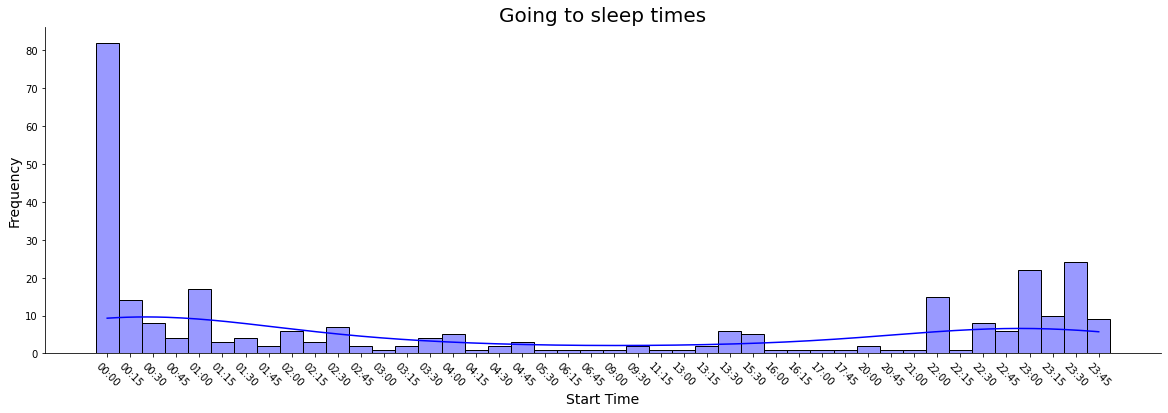

In [31]:
sleep_df = filtered_dataset.loc[filtered_dataset['PrimaryActivityCode'] == 'S801']

plt.figure(figsize=(20,6))
plt.xticks(rotation=-45)
ax = sns.histplot(data=sleep_df.sort_values(by=['StartTime']), x='StartTime', kde=True, color='blue', alpha=0.4)
plt.title('Going to sleep times', fontsize=20)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Start Time', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Question
- At what times to they wake up?

### Process and Hypotheses
Using the filtered activities I can now observe their EndTime and find the distribution of when people usually wake up. Assuming as before that people went to sleep at around midnight I would expect them to wake up 7-9 hours later.

### Result
As shown from the following figure the majority distribution of times when the students wake up begins from 06:00 up to 11:00. There are peaks at other hours as peoples sleep pattern can greatly vary but the reason for the peak at 00:00 I have concluded that it is due to how the time diary recording was structured. Since people recorded days midnight to midnight they probably entered 2 activities for 1 days worth of sleep eg.(from 22:00 to 00:00 and from 00:00 to 07:00)

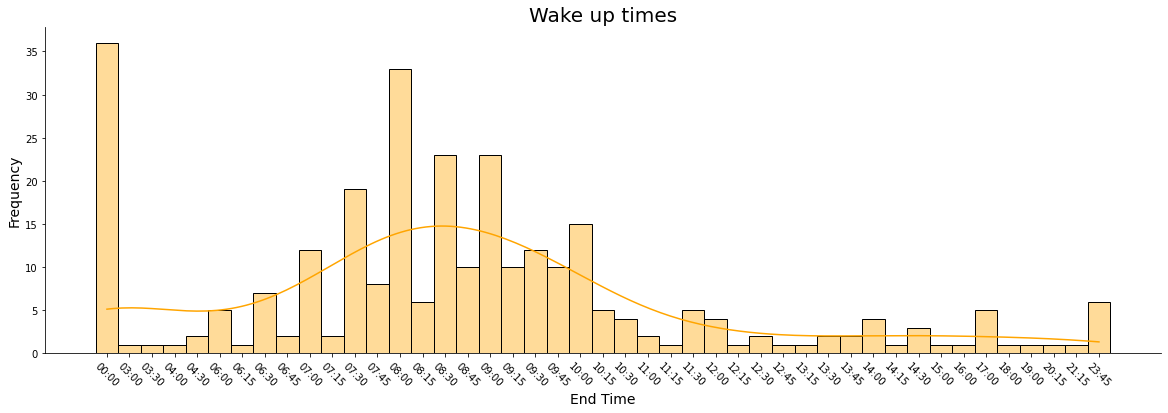

In [32]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=-45)
ax = sns.histplot(data=sleep_df.sort_values(by=['EndTime']), x='EndTime', kde=True, color='orange', alpha=0.4)
plt.title('Wake up times', fontsize=20)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('End Time', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Question
- When is their studying time? Both Starting time and end time?

### Process and Hypotheses
In order to identify the common times I filtered the activities using the codes of 'Education / Lectures' and 'Coursework'. Using their StartTime and EndTime I should be able to observe the distribution of studying times between the students. I expect these times to vary as everyone can have different preferences. 

### Result
These times are seen to be mostly spread throughout the day except certain times like 10:30 and 14:30 where we have multiple entries for students' Starting Time.

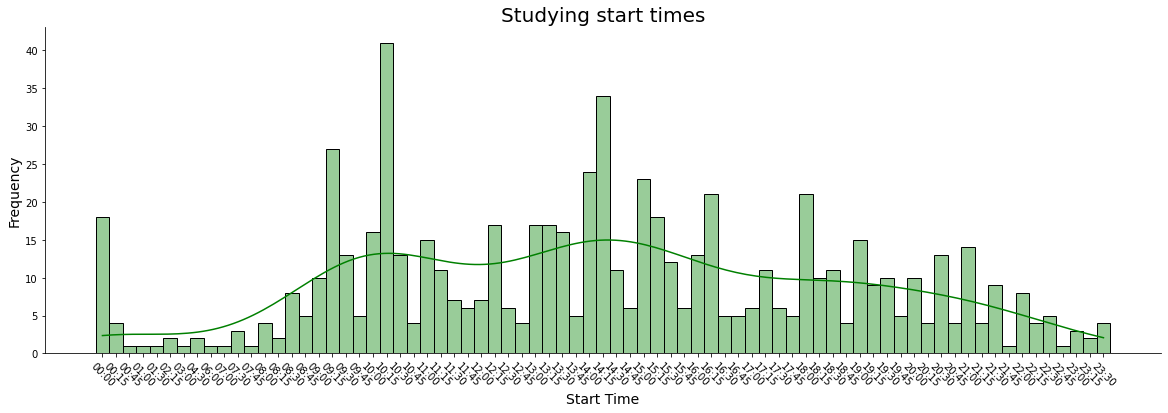

In [33]:
studying_df = filtered_dataset.loc[filtered_dataset.isin(['CW982', 'EL642']).any(axis=1)]

plt.figure(figsize=(20,6))
plt.xticks(rotation=-45)
ax = sns.histplot(data=studying_df.sort_values(by=['StartTime']), x='StartTime', kde=True, color='green', alpha=0.4)
plt.title('Studying start times', fontsize=20)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Start Time', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

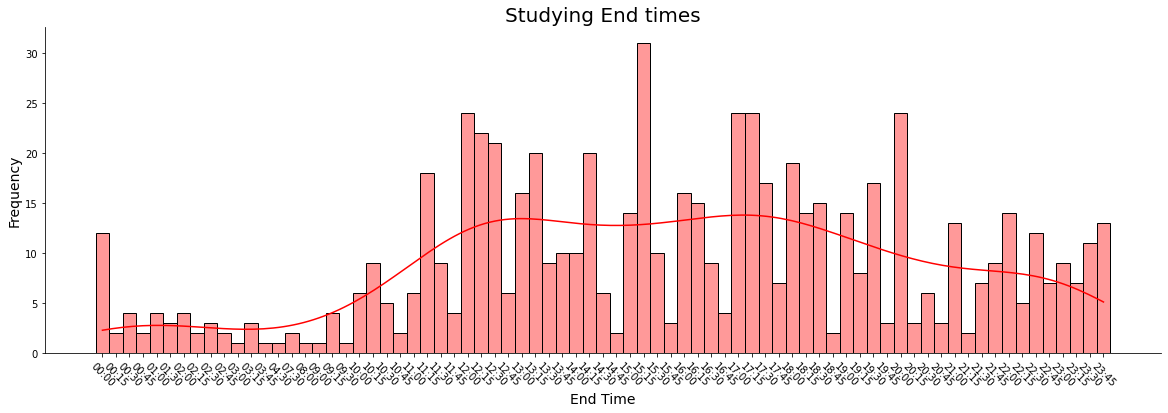

In [34]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=-45)
ax = sns.histplot(data=studying_df.sort_values(by=['EndTime']), x='EndTime', kde=True, color='red', alpha=0.4)
plt.title('Studying End times', fontsize=20)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('End Time', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Question
- What activities do they find enjoyable?

### Process and Hypotheses
Finding the Average EnjoymentScore for each activies would show the distribution of general enjoyment when doing certain tasks. It should show what are the most enjoyable and least enjoyable activities out of the bunch.

### Result
From the following figure I have observed that the 3 most common enjoyable activities where 'leisure', 'exercise' and 'sleep' and for the least enjoyable activity, it was 'housework', which I believe we can all relate!

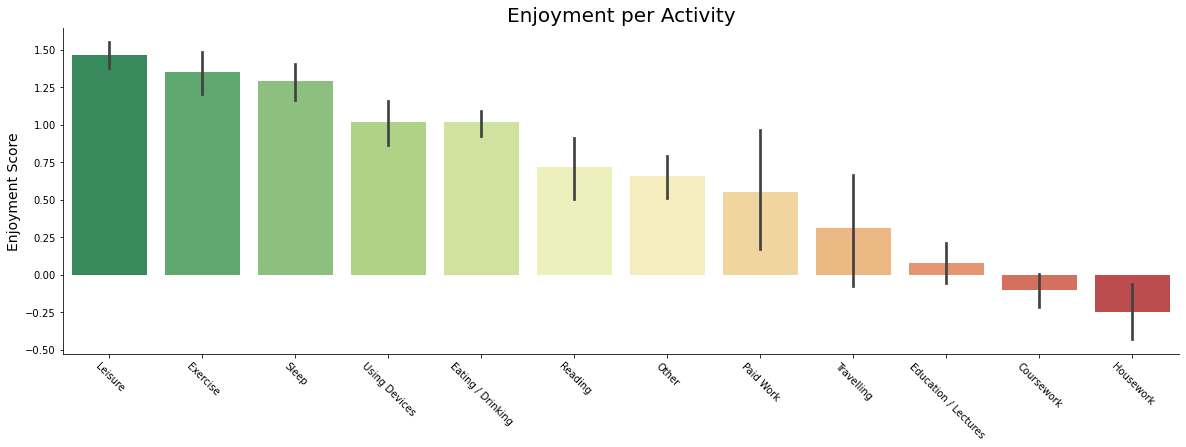

In [35]:
plt.figure(figsize=(20,6))

# https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1
result = filtered_dataset.groupby(["PrimaryActivityCode"])['EnjoymentScore'].aggregate(np.mean).reset_index().sort_values('EnjoymentScore', ascending = False)
ax = sns.barplot(x='PrimaryActivityCode', y='EnjoymentScore', data=filtered_dataset, order=result['PrimaryActivityCode'], alpha=0.9, palette='RdYlGn_r')

code_labels = [label.get_text()  for label in ax.get_xticklabels()]
code_description_dict = {'ED145':'Eating / Drinking', 'EL642':'Education / Lectures', 'X893':'Exercise', 'H179':'Housework', 'L418':'Leisure', 'R523':'Reading', 'S801':'Sleep', 'T695':'Travelling', 'UD415':'Using Devices', 'PW101':'Paid Work', 'CW982':'Coursework', 'O733':'Other'}
description_labels = [code_description_dict[label] for label in code_labels]

plt.xticks(rotation=-45)
ax.set_xticklabels(description_labels)
plt.xlabel('')
plt.ylabel('Enjoyment Score', fontsize=14)

plt.title('Enjoyment per Activity', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Question
- Activity Duration?

### Process and Hypotheses
Finding the average duration of minutes for each activity will show where students mostly spend their time. This kind of insight can hint where should people spend more or less time to better distribute their times amongst activities.

### Result
From the next figure it is obvious that sleep takes a significant chunch of a day's time with 'Paid Work' coming in second with 175 average duration and with 'Coursework' in 3rd with 134 average minute duration.

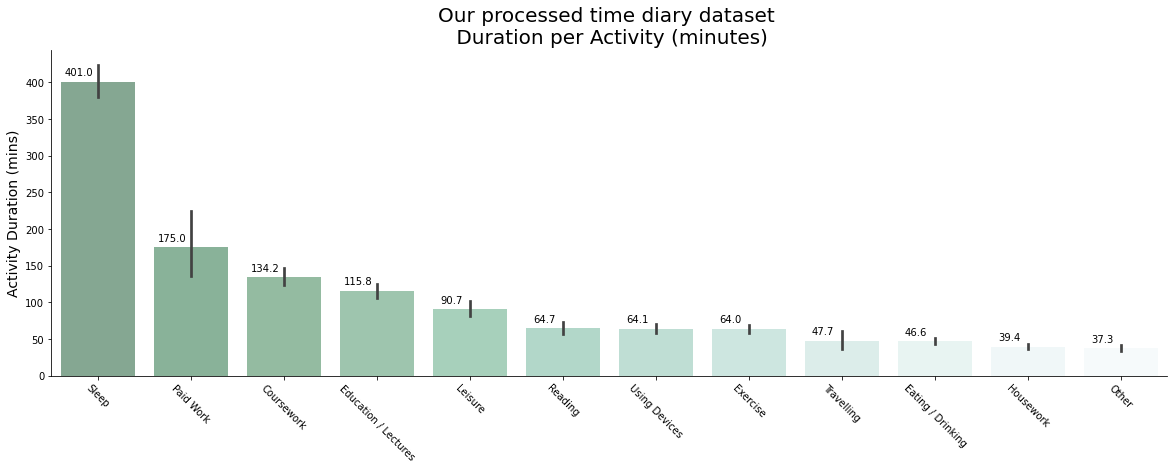

In [36]:
plt.figure(figsize=(20,6))

# https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1
result = filtered_dataset.groupby(["PrimaryActivityCode"])['DurationMins'].aggregate(np.mean).reset_index().sort_values('DurationMins', ascending = False)
ax = sns.barplot(x='PrimaryActivityCode', y='DurationMins', data=filtered_dataset, order=result['PrimaryActivityCode'], alpha=0.5, palette='BuGn_r')

# https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + (1.5*p.get_width()) / 6., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    
code_labels = [label.get_text()  for label in ax.get_xticklabels()]
code_description_dict = {'ED145':'Eating / Drinking', 'EL642':'Education / Lectures', 'X893':'Exercise', 'H179':'Housework', 'L418':'Leisure', 'R523':'Reading', 'S801':'Sleep', 'T695':'Travelling', 'UD415':'Using Devices', 'PW101':'Paid Work', 'CW982':'Coursework', 'O733':'Other'}
description_labels = [code_description_dict[label] for label in code_labels]

plt.xticks(rotation=-45)
ax.set_xticklabels(description_labels)
plt.xlabel('')
plt.ylabel('Activity Duration (mins)', fontsize=14)
plt.title('Our processed time diary dataset \n Duration per Activity (minutes)', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Publicly available time diary dataset

Accessing one of the links that was provided in the coursework pdf (https://www.kaggle.com/bls/american-time-use-survey) .Then going in the Acknowledgements section to access the original datasets. Finally, downloading the Activity summary file (ATUS 2003-2015 Activity summary file (zip)) from here https://www.bls.gov/tus/datafiles_0315.htm

In [37]:
# Using the extracted .dat file I used pandas to read it to a dataframe
data = pd.read_csv('atusact_0315.dat', sep=',')
print(data.shape)

(3347093, 29)


In [38]:
data.head()

,TUCASEID,TUACTIVITY_N,TUACTDUR24,TUCC5,TUCC5B,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TUSTARTTIM,TUSTOPTIME,...,TRTONHH_LN,TRTOHH_LN,TRTHH_LN,TRTNOHH_LN,TEWHERE,TUCC7,TRWBELIG,TRTEC_LN,TUEC24,TUDURSTOP
0,20030100013280,1,60,-1,-1,-1,-1,-1,04:00:00,05:00:00,...,-1,-1,-1,-1,9,-1,-1,-1,-1,-1
1,20030100013280,2,30,-1,-1,-1,-1,-1,05:00:00,05:30:00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,20030100013280,3,600,-1,-1,-1,-1,-1,05:30:00,15:30:00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,20030100013280,4,150,-1,-1,-1,-1,-1,15:30:00,18:00:00,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
4,20030100013280,5,5,-1,-1,-1,-1,-1,18:00:00,18:05:00,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1


Going through the structure of the Dataset I identified that the column <b>TRCODEP</b> holds the activity IDs which their description can be identified from the Lexicon https://www.bls.gov/tus/lexiconnoex0315.pdf . And also the <b>TUACTDUR</b> holds the pre-calculated activity duration.

In [39]:
filtered_data_columns = ['TUCASEID','TUACTIVITY_N', 'TRCODEP','TUSTARTTIM','TUSTOPTIME','TUACTDUR']
filtered_data = data[filtered_data_columns].copy()

In [40]:
filtered_data.head()

,TUCASEID,TUACTIVITY_N,TRCODEP,TUSTARTTIM,TUSTOPTIME,TUACTDUR
0,20030100013280,1,130124,04:00:00,05:00:00,60
1,20030100013280,2,10201,05:00:00,05:30:00,30
2,20030100013280,3,10101,05:30:00,15:30:00,600
3,20030100013280,4,120303,15:30:00,18:00:00,150
4,20030100013280,5,110101,18:00:00,18:05:00,5


- Eating / Drinking - 11
- Education / Lectures - 06
- Coursework - 0603
- Exercise - 13
- Housework - 02
- Leisure - 12
- Reading - 120312
- Sleep - 0101
- Travelling - 18
- Using Devices - 16
- Paid Work - 05
- Other - Fill at the end

In [41]:
# List to hold all Activity Descriptions
ActivityDescription_list = []

# Iterating through all of the activity codes in the dataset
for act_code in filtered_data['TRCODEP'].values:

    activity_code = str(act_code)
    
    # Filling preceding 0 if it was removed
    if len(activity_code) != 6:
        activity_code = '0' + activity_code
        
    # Using the activity code to match it to its corresponding description
    if activity_code[:2] == '11':
        activity_desc = 'Eating / Drinking'
    elif activity_code[:2] == '06':
        activity_desc = 'Education / Lectures'
        if activity_code[:4] == '0603':
            activity_desc = 'Coursework'
    elif activity_code[:2] == '13':
        activity_desc = 'Exercise'
    elif activity_code[:2] == '02':
        activity_desc = 'Housework'
    elif activity_code[:2] == '12':
        activity_desc = 'Leisure'
        if activity_code[:6] == '120312':
            activity_desc = 'Reading'
    elif activity_code[:4] == '0101':
        activity_desc = 'Sleep'
    elif activity_code[:2] == '18':
        activity_desc = 'Travelling'
    elif activity_code[:2] == '16':
        activity_desc = 'Using Devices'
    elif activity_code[:2] == '05':
        activity_desc = 'Paid Work'
    else:
        activity_desc = 'Other'
    
    # Appending the description to a list
    ActivityDescription_list.append(activity_desc)

# Finally creating the column and filling it with the list of activity descriptions
filtered_data["ActivityDescription"] = np.asarray(ActivityDescription_list)

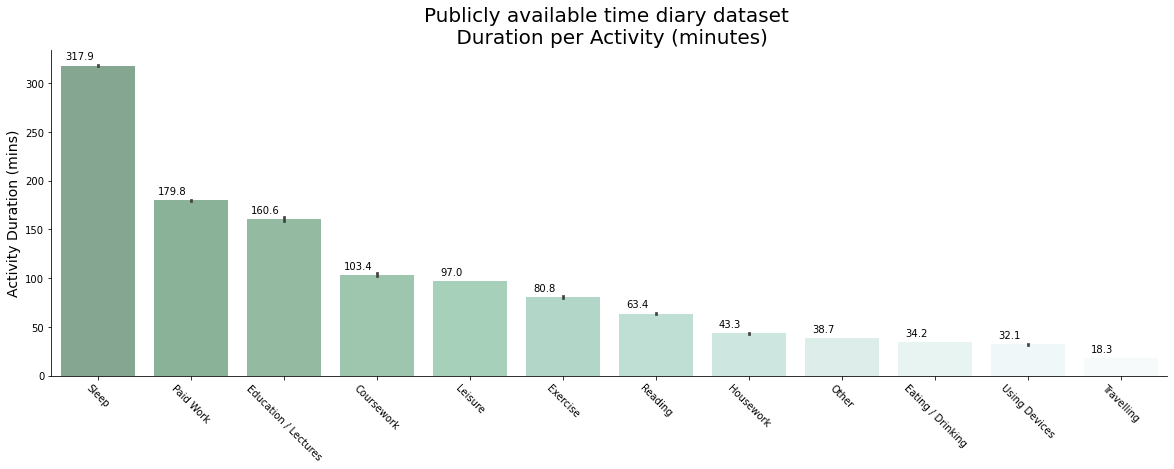

In [42]:
plt.figure(figsize=(20,6))

# https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1
result = filtered_data.groupby(["ActivityDescription"])['TUACTDUR'].aggregate(np.mean).reset_index().sort_values('TUACTDUR', ascending = False)
ax = sns.barplot(x='ActivityDescription', y='TUACTDUR', data=filtered_data, order=result['ActivityDescription'], alpha=0.5, palette='BuGn_r')

# https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + (1.5*p.get_width()) / 6., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xticks(rotation=-45)
plt.xlabel('')
plt.ylabel('Activity Duration (mins)', fontsize=14)
plt.title('Publicly available time diary dataset \n Duration per Activity (minutes)', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()